# **<h3 align="center">**חקר הגורמים המשפיעים על מחירי בתים**</h3>**
# <h3 align="center">**מגישות: שיר מרגולין, נואר מנאסרה, שיר בן צור, אלינור חיו**</h3>






<center><img src="https://i-capital.co.il/wp-content/uploads/2021/06/%D7%94%D7%A9%D7%A7%D7%A2%D7%95%D7%AA-%D7%A0%D7%93%D7%9C%D7%9F-1024x682.jpg" width="500"/></center>


                                              

השתמשנו בקובץ שמכיל פרטים אודות מכירות של בתים במדינת וושיטנגטון, ארה"ב*

https://www.kaggle.com/esratmaria/house-price-dataset-with-other-information

## ?שאלת המחקר: איך הגורמים הבלתי תלויים משפיעים על הגורם התלוי

<u>הגורם התלוי</u>:מחיר הבית 

<u>הגורמים הבלתי תלוים:</u> מספר החדרים,שטח הבית הבנוי,שטח הבית הכולל,נוף,קרבה למקור מים,מיקוד 


## תוכן עניינים 
<a id='section0'></a>
1. [בדיקת\תיקון נתונים](#section1)
2. [חקר קשרים](#section2)

   2.1 [קשר בין מספר החדרים למחיר](#section2.1)
   
   2.2 [השפעת המיקוד על מחירי הבתים ](#section2.2)
   
   2.3 [הקשר בין מחיר הבית לשטח הבית הכולל ](#section2.3) 
   
   2.4 [הקשר בין מחיר לשטח הבנוי](#section2.4) 
   
   2.5 [ הקשר בין מחיר לשנת הבניה, הנוף, והקרבה למקור מים](section2.5)
   
   2.6 [הקשר בין הנוף למחיר הדירה ](section2.6)
  
3. [סיכום](#section3)



## <u style='background:yellow'> בדיקת\תיקון נתונים.1 </u>


### הורדת ספריות 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### קישור קובץ

In [4]:
url='https://raw.githubusercontent.com/ElinorH/Final_Project/main/Houses%20Prices'
house_prices_df=pd.read_csv(url)
house_prices_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### תיקון תאריך

In [5]:
house_prices_df['date'] = pd.DatetimeIndex(house_prices_df['date']).date

### בדיקת ערכים חסרים

In [6]:
null_counter= house_prices_df.isnull().sum()
null_counter

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

אין ערכים חסרים  <-

## <u>חקר הקשרים.2</u>

### <u style='background:yellow'> 2.1 הקשר בין מספר החדרים למחיר הדירה</u>

ניצור השמה חדשה עם העמודות:

*מס חדרים

*מחיר

In [7]:
bedrooms_and_prices= house_prices_df.loc[:,['bedrooms','price']].copy()
bedrooms_and_prices.head(10)

,bedrooms,price
0,3,221900.0
1,3,538000.0
2,2,180000.0
3,4,604000.0
4,3,510000.0
5,4,1225000.0
6,3,257500.0
7,3,291850.0
8,3,229500.0
9,3,323000.0


#### ערכים חריגים במספר חדרים

<AxesSubplot:>

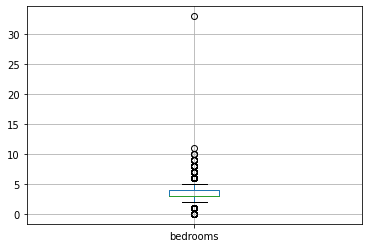

In [8]:
bedrooms_and_prices.boxplot('bedrooms')


ראינו שיש נתונים חריגים של מספר חדרים גדול מ-10 וקטן מ-1 ,לכן החלטנו להתעלם מתחום זה בשביל להתעסק בבתים ממוצעים ולקבל מידע מדוייק יותר עבורם 

מכוון שנתייחס לבתים בעלי חדר אחד עד עשרה חדרים,נסיר את הערכים החריגים 

In [9]:
bedrooms_and_prices=bedrooms_and_prices.loc[(bedrooms_and_prices.bedrooms <= 10) & (bedrooms_and_prices.bedrooms > 0)]

<AxesSubplot:>

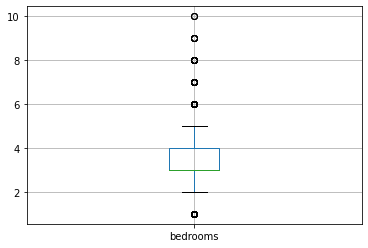

In [10]:
bedrooms_and_prices.boxplot('bedrooms')

#### ערכים חריגים במחיר 

<AxesSubplot:>

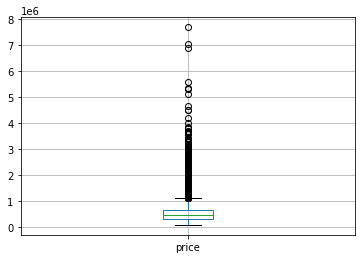

In [11]:
bedrooms_and_prices.boxplot('price')

כרגע החלטנו לעבוד עם כל ערכי המחירים, בגלל שהם הגורם התלוי אותו אנו בודקות 

(הערכים הם במליון דולר)

#### קו רגרסיה

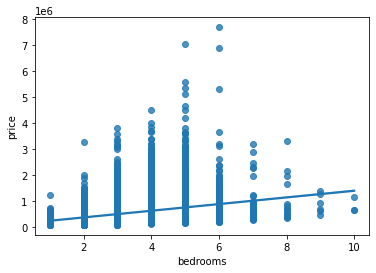

In [12]:
sns.regplot(x='bedrooms', y='price', data=bedrooms_and_prices);

 ניתן לראות קשר בין מספר החדרים למחיר אך קשר זה אינו משמעותי 
 

#### קורלציה


הנתונים נורמלים, ולכן אפשר לעבוד עם קורלציה של פירסון



In [13]:
bedrooms_and_prices[['bedrooms', 'price']].corr(method='pearson')

,bedrooms,price
bedrooms,1.000000,0.316602
price,0.316602,1.000000



הקורלציה יחסית נמוכה, לכן אפשר להסיק שיש נתונים אחרים שמשפיעים 

שלב א: איחוד עמודות 

In [14]:
house_prices_df.groupby('zipcode')[['id']].count().sort_values('id', ascending = False).head(5)

,id
zipcode,
98103,602
98038,590
98115,583
98052,574
98117,553


שלב ב: נבחר שתי קבוצות ניסוי

נבחר את הקבוצות שיש להן הכי הרבה נתונים

### קבוצה 1
 מדינות עם מיקוד 98103

In [15]:
bedrooms_and_prices_98103= house_prices_df.loc[:,['bedrooms','price','zipcode']].copy()
bedrooms_and_prices_98103=bedrooms_and_prices_98103[house_prices_df['zipcode']== 98103]
bedrooms_and_prices_98103=bedrooms_and_prices_98103.loc[(bedrooms_and_prices_98103.bedrooms <= 10) & (bedrooms_and_prices_98103.bedrooms > 0)]
bedrooms_and_prices_98103.head(5)

,bedrooms,price,zipcode
17,4,485000.0,98103
111,3,570000.0,98103
116,3,518500.0,98103
128,5,822500.0,98103
149,3,511000.0,98103


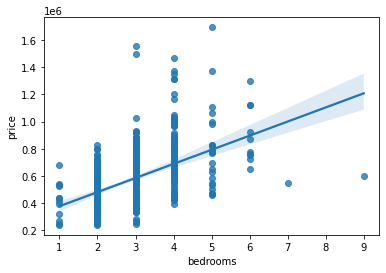

In [16]:
sns.regplot(x='bedrooms', y='price', data=bedrooms_and_prices_98103);

ניתן לראות קשר חיובי בין מספר החדרים למחיר  



נבדוק  את הקורלציה(הנתונים לא נורמליים- ספרמן)*

In [17]:
bedrooms_and_prices_98103[['bedrooms', 'price']].corr(method='spearman')

,bedrooms,price
bedrooms,1.000000,0.481884
price,0.481884,1.000000


הקורלציה אומנם יותר גבוה מהמצב המקורי, אבל לא בצורה משמעותית כמו שחשבנו 

### קבוצה 2
 מדינות עם מיקוד 98038

In [18]:
bedrooms_and_prices_98038= house_prices_df.loc[:,['bedrooms','price','zipcode']].copy()
bedrooms_and_prices_98038=bedrooms_and_prices_98038[house_prices_df['zipcode']== 98038]
bedrooms_and_prices_98038=bedrooms_and_prices_98038.loc[(bedrooms_and_prices_98038.bedrooms <= 10) & (bedrooms_and_prices_98038.bedrooms > 0)]
bedrooms_and_prices_98038.head(5)

,bedrooms,price,zipcode
9,3,323000.0,98038
73,4,360000.0,98038
80,3,390000.0,98038
81,4,360000.0,98038
98,3,314000.0,98038


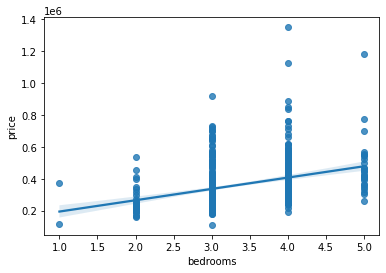

In [19]:
sns.regplot(x='bedrooms', y='price', data=bedrooms_and_prices_98038);

ניתן לראות קשר חיובי בין מספר החדרים למחיר 

נבדוק  את הקורלציה(הנתונים לא נורמליים- ספרמן)

In [20]:
bedrooms_and_prices_98038[['bedrooms', 'price']].corr(method='spearman')

,bedrooms,price
bedrooms,1.000000,0.467142
price,0.467142,1.000000


הקורלציה אומנם יותר גבוה מהמצב המקורי, אבל לא בצורה משמעותית כמו שחשבנו

####  הצגת הקשר בין מספר החדרים למחיר

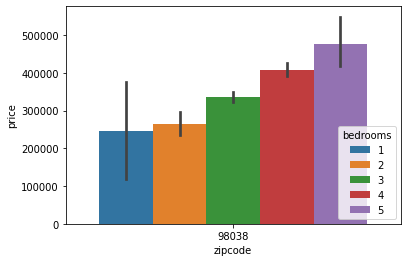

In [21]:
sns.barplot(x="zipcode", y="price", hue="bedrooms",  data=bedrooms_and_prices_98038)
plt.show()

### **<u style='background:orange'>מסקנה ראשונה</u>**

למרות ההגיון, הקשר בין מספר החדרים למחיר של אותו בית קיים אבל לא משמעותי במיוחד<-


### <u  style='background:yellow'>2.2 השפעת המיקוד על מחירי הבתים</u>




מיון מיקוד לפי מחיר ממוצע של הבתים באותו האיזור

In [22]:
house_prices_df.groupby('zipcode')[['price']].mean().sort_values('price',ascending= False)

,price
zipcode,
98039,2.160607e+06
98004,1.355927e+06
98040,1.194230e+06
98112,1.095499e+06
98102,9.012583e+05
...,...
98148,2.849086e+05
98001,2.808047e+05
98032,2.512962e+05


bedrooms_and_prices_MAXPRICE השמה לחמשת האיזורים עם המחיר הממוצע הכי גבוה בשם
 

In [23]:
bedrooms_and_prices_MAXPRICE= house_prices_df.loc[:,['bedrooms','price','zipcode']].copy()
bedrooms_and_prices_MAXPRICE=bedrooms_and_prices_MAXPRICE[(bedrooms_and_prices_MAXPRICE['zipcode']== 98039) |(bedrooms_and_prices_MAXPRICE['zipcode']== 98004 )|(bedrooms_and_prices_MAXPRICE['zipcode']== 98040)|(bedrooms_and_prices_MAXPRICE['zipcode']== 98112)|(bedrooms_and_prices_MAXPRICE['zipcode']== 98102)   ]
bedrooms_and_prices_MAXPRICE=bedrooms_and_prices_MAXPRICE.loc[(bedrooms_and_prices_MAXPRICE.bedrooms <= 6) & (bedrooms_and_prices_MAXPRICE.bedrooms > 1)]
bedrooms_and_prices_MAXPRICE.head(3)

,bedrooms,price,zipcode
21,3,2000000.0,98040
27,3,667000.0,98112
66,4,975000.0,98004


bedrooms_and_prices_MINIPRICE השמה לחמשת האיזורים עם המחיר הממוצע הכי קטן בשם


In [24]:
bedrooms_and_prices_MINIPRICE= house_prices_df.loc[:,['bedrooms','price','zipcode']].copy()
bedrooms_and_prices_MINIPRICE=bedrooms_and_prices_MINIPRICE[(bedrooms_and_prices_MINIPRICE['zipcode']== 98148) |(bedrooms_and_prices_MINIPRICE['zipcode']== 98001 )|(bedrooms_and_prices_MINIPRICE['zipcode']== 98032)|(bedrooms_and_prices_MINIPRICE['zipcode']== 98168)|(bedrooms_and_prices_MINIPRICE['zipcode']== 98002)   ]
bedrooms_and_prices_MINIPRICE=bedrooms_and_prices_MINIPRICE.loc[(bedrooms_and_prices_MINIPRICE.bedrooms <= 6) & (bedrooms_and_prices_MINIPRICE.bedrooms > 1)]
bedrooms_and_prices_MINIPRICE.head(3)

,bedrooms,price,zipcode
18,2,189000.0,98002
25,3,233000.0,98002
38,4,240000.0,98001


#### נציג את המערכים בגרפים

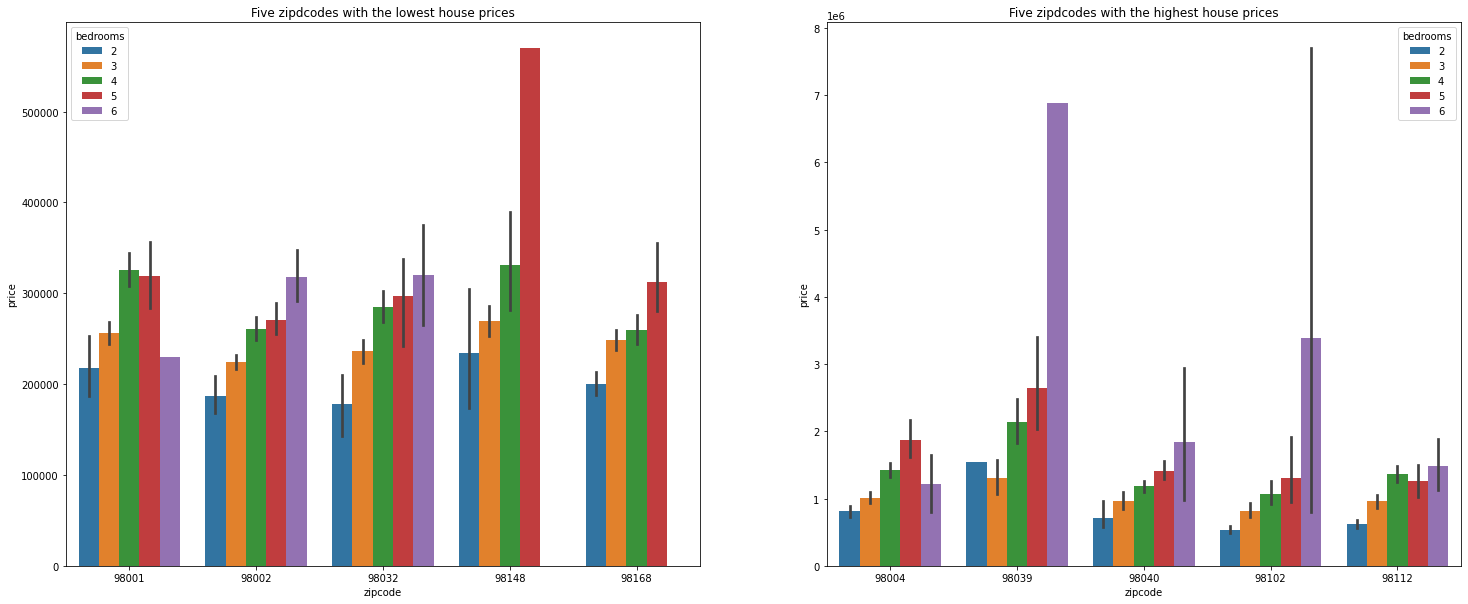

In [25]:
fig, axes = plt.subplots(figsize=(25, 10), ncols=2)
ax0=sns.barplot(x="zipcode", y="price", hue="bedrooms",  data=bedrooms_and_prices_MINIPRICE, ax = axes[0])
ax0.title.set_text('Five zipdcodes with the lowest house prices')
ax1=sns.barplot(x="zipcode", y="price", hue="bedrooms",  data=bedrooms_and_prices_MAXPRICE,ax = axes[1])
ax1.title.set_text('Five zipdcodes with the highest house prices')

### **<u style='background:orange'>מסקנה שנייה</u>**

לפי הגרפים, ניתן לראות שבאיזורים מסויימים, מספר גדול מידי של חדרים(5 ומעלה) יכול לגרום להורדת ערך הבית

אפשר להסיק שזה בגלל תחזוקה גבוה שבית גדול דורש או מספר נפשות שלא מתאים לבית עם מספר חדרים גדול.

### <u style='background:yellow'> 2.3 הקשר בין מחיר הבית לשטח הבית הכולל</u>
אם הקשר בין מספר החדרים והמחיר לא כלך כך גבוה, אולי שטח הבית הוא משמעותי יותר מבחינת המחיר? נבדוק זאת

sqft_and_prices השמה של מערך המכיל את גודל הבית והמחיר בשם 

In [26]:
sqft_and_prices= house_prices_df.loc[:,['sqft_lot','price']].copy()
sqft_and_prices.head(5)

,sqft_lot,price
0,5650,221900.0
1,7242,538000.0
2,10000,180000.0
3,5000,604000.0
4,8080,510000.0


#### ערכים חריגים בשטח הבית הכולל 

<AxesSubplot:>

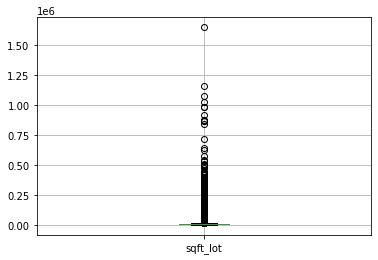

In [27]:
sqft_and_prices.boxplot('sqft_lot')


נתייחס לבתים בשטח 1000  עד 5000 
כדי להתייחס  למידע ממוצע ללא פיזור

In [28]:
sqft_and_prices=sqft_and_prices.loc[(sqft_and_prices.sqft_lot <= 5000) & (sqft_and_prices.sqft_lot > 1000)]

<AxesSubplot:>

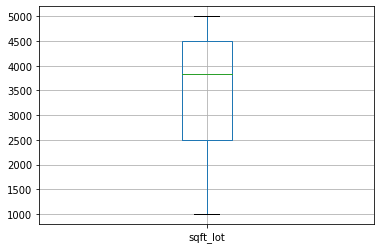

In [29]:
sqft_and_prices.boxplot('sqft_lot')

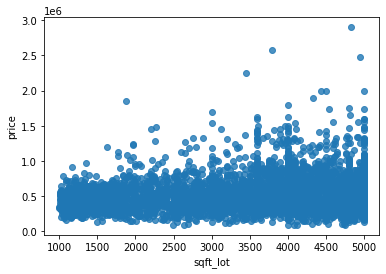

In [30]:
sns.regplot(x='sqft_lot', y='price', data=sqft_and_prices);

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

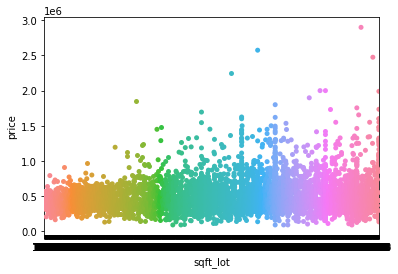

In [31]:
sns.stripplot(x="sqft_lot", y="price", data=sqft_and_prices, jitter=0.02)


#### קורלציה
נבדוק את הקורלציה(הנתונים לא נורמליים- ספרמן)

In [32]:
sqft_and_prices[['sqft_lot', 'price']].corr(method='spearman')

,sqft_lot,price
sqft_lot,1.00000,0.14405
price,0.14405,1.00000


הקורלציה נמוכה מדי בשביל להעיד על קשר... נבדוק תת תחום- שטח בנוי

### <u style='background:yellow'>2.4  הקשר בין מחיר הבתים לשטח הבנוי שלהם</u> 


sqft_living_and_prices השמה של מערך המכיל את שטח הבית הבנוי והמחיר 

In [33]:
sqft_living_and_prices= house_prices_df.loc[:,['sqft_living','price']].copy()
sqft_living_and_prices.head(10)

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1225000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


#### ערכים חריגים בשטח הבית הבנוי 

<AxesSubplot:>

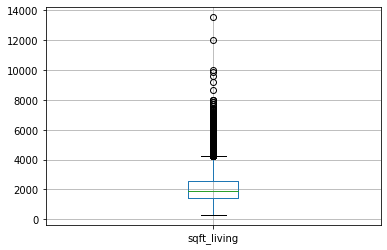

In [34]:
sqft_living_and_prices.boxplot('sqft_living')

נתייחס לבתים בשטח 500  עד 4000 
כדי להתייחס יותר למידע ממוצע ללא פיזור

In [35]:
sqft_living_and_prices=sqft_living_and_prices.loc[(sqft_living_and_prices.sqft_living <= 4000) & (sqft_living_and_prices.sqft_living > 500)]

<AxesSubplot:>

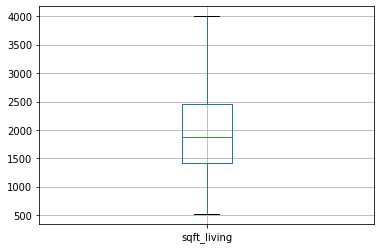

In [36]:
sqft_living_and_prices.boxplot('sqft_living')

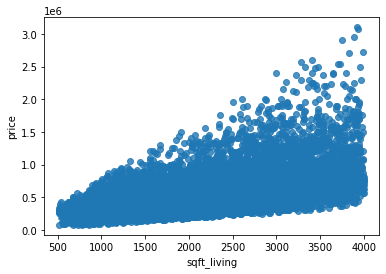

In [37]:
sns.regplot(x='sqft_living', y='price', data=sqft_living_and_prices);

#### קורלציה
נבדוק  את הקורלציה (הנתונים לא נורמליים- ספרמן)

In [38]:
sqft_living_and_prices[['sqft_living', 'price']].corr(method='spearman')

,sqft_living,price
sqft_living,1.000000,0.607147
price,0.607147,1.000000


מהרגרסיה והקורלציה אפשר לראות קשר חיובי משמעותי בין השטח הבנוי של הבית למחיר שלו

### **<u style='background:orange'>מסקנה שלישית</u>**
מבין שלושה משתנים שונים(מספר חדרים, שטח הבית, שטח בנוי) המשפיעים על מחירי הבית,

המשתנה של השטח הבנוי הוא בעל ההשפעה הגבוהה ביותר. 
  

### <u style='background:yellow'>2.5 הקשר בין מחיר הבית לשנת הבניה, הנוף, והקרבה למקור מים</u>

yr_built_waterfront_view השמה של מערך המכיל את שנת הבניה, הקרבה למקור מים והמחיר בשם:

In [39]:
yr_built_waterfront_view= house_prices_df.loc[:,['yr_built','price','waterfront','view']].copy()
yr_built_waterfront_view.head(4)

,yr_built,price,waterfront,view
0,1955,221900.0,0,0
1,1951,538000.0,0,0
2,1933,180000.0,0,0
3,1965,604000.0,0,0


#### ערכים חריגים בשנת בניה, נוף, קרבה למים 


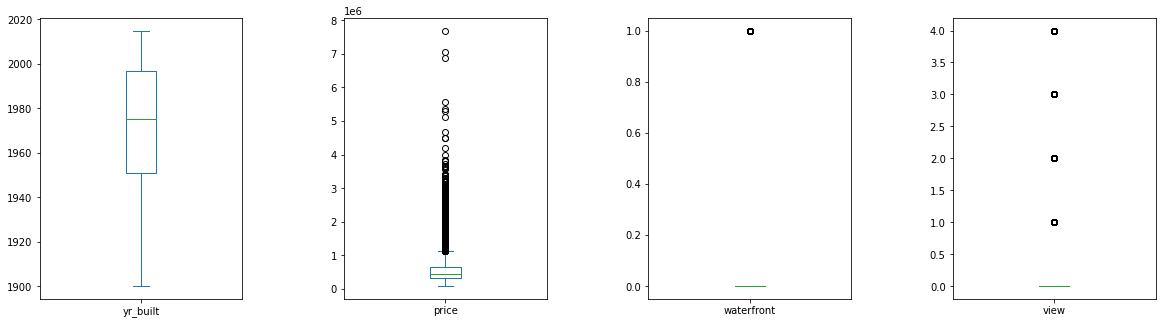

In [40]:
df_to_plot = yr_built_waterfront_view
df_to_plot = df_to_plot.select_dtypes(include=np.number)
df_to_plot.plot(subplots=True, layout=(5,4), kind='box', figsize=(20,30))
plt.subplots_adjust(wspace=0.5);

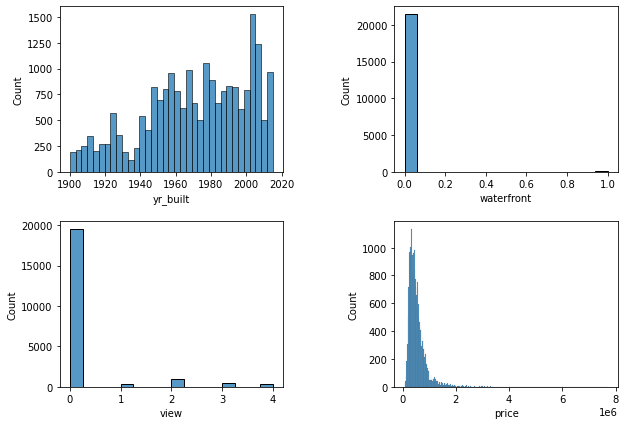

In [41]:
features = ['yr_built', 'waterfront','view','price']
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(wspace=0.5, hspace = 0.3)
axes = axes.flatten()
for i,att in enumerate(features):
    sns.histplot(x=att, data=yr_built_waterfront_view,  ax=axes[i])

#### קורלציה
נתונים לא נורמלים- ספירמן

<AxesSubplot:>

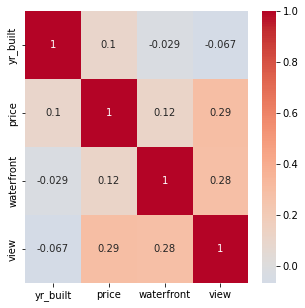

In [42]:
corrs = yr_built_waterfront_view.corr(method = 'spearman')
plt.figure(figsize=(5,5))  #figure size
sns.heatmap(corrs,  cmap='coolwarm', center =0, annot = True )

### **<u style='background:orange'>מסקנה רביעית </u>**
מבין המשתנים השונים (נוף, קרבה לים, ושנת בניה) של הקורלציות ניתן לראות שגורם ההשפעה הגבוה ביותר על מחירי הבתים הוא הנוף. 


### <u style='background:yellow'>2.6 הקשר בין נוף למחיר הדירה </u>

נדגום קבצים שמכילים רק את הבתים בשכונה הכי יוקרתית, והכי פחות יוקרתית(נשתמש ביוקרה כמשתנה שמעיד על מחיר הדירות)

Medina העיר עם הבתים הכי יוקרתיים היא
<center><img src="https://leadingestates.com/wp-content/uploads/2015/11/184-88-medina-01.jpg" width="500"/></center>


In [43]:
bedrooms_and_prices_98039= house_prices_df.loc[:,['view','zipcode']].copy()
bedrooms_and_prices_98039=bedrooms_and_prices_98039[bedrooms_and_prices_98039['zipcode']== 98039]
bedrooms_and_prices_98039.head(5)

,view,zipcode
2974,0,98039
3761,0,98039
4077,0,98039
4078,0,98039
4149,0,98039


Auburn העיר עם מחירי בתים הכי זולים היא
<center><img src="https://upload.wikimedia.org/wikipedia/commons/0/0e/Auburn_station_plaza_from_garage.jpg" width="500"/></center>


In [44]:
bedrooms_and_prices_98001= house_prices_df.loc[:,['view','zipcode']].copy()
bedrooms_and_prices_98001=bedrooms_and_prices_98001[bedrooms_and_prices_98001['zipcode']== 98001]
bedrooms_and_prices_98001.head(5)

,view,zipcode
38,0,98001
67,0,98001
114,3,98001
213,0,98001
292,0,98001


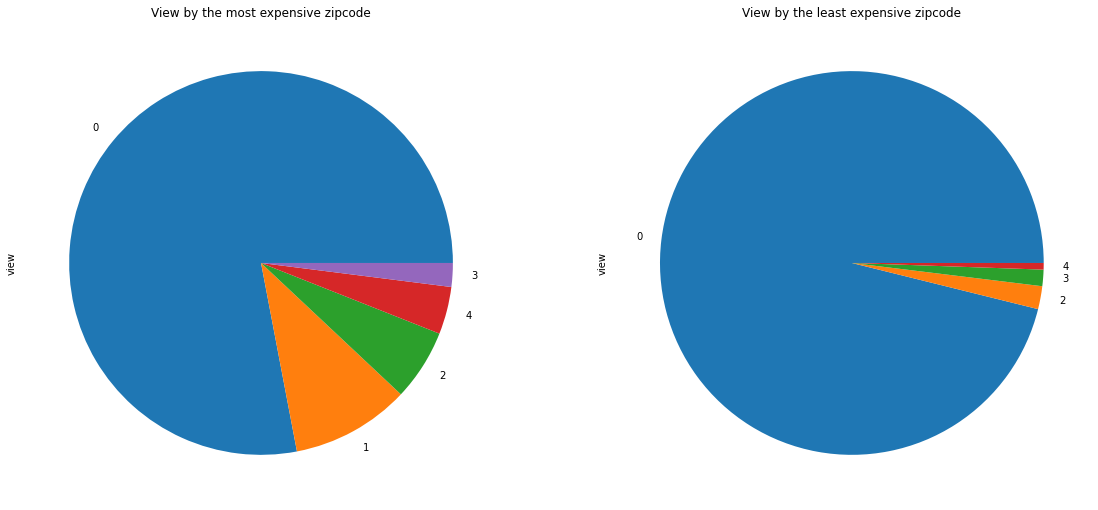

In [45]:
plt.figure(1, figsize=(30,30))
plt.subplot(3,3,1)
plt.title("View by the most expensive zipcode")
bedrooms_and_prices_98039['view'].value_counts().plot.pie(autopct="") 
plt.subplot(3,3,2)
plt.title("View by the least expensive zipcode")
bedrooms_and_prices_98001['view'].value_counts().plot.pie(autopct="")
plt.show()

### **<u style='background:orange'>מסקנה חמישית</u>**

נוף הוא מצרך נדיר , אפשר לראות שבשכונות יוקרתיות יותר, יש נוף יותר טוב <-

משמע נוף לא מרכיב חובה כשמדובר במחירי הדירות, אבל כשהוא קיים הוא אכן משפיע ומעלה את ערך הדירה

# <u style='background:yellow'> סיכום.3 </u>


בעבודה, חקרנו את ההשפעה של משתנים שונים על מחירי בתים,
במטרה להראות שמחירי בתים לא תמיד נקבעים דווקא ע"פ המובן מאליו .
ראינו שמספר החדרים לא תמיד משפיע על המחיר, ולפעמים אפילו גורע ממנו-
 באזורים מסוימים , בתים עם חמישה חדרים או יותר יהיה יותר זולים מאשר בתים עם פחות חדרים.
כמו שאמרנו מוקדם יותר, יכול להיות שהתופעה הזאת נובעת מתחזוקת בית גבוהה שבתים עם מספר רב של חדרים דורשים.
בנוסף לכך, לאחר מספר בדיקות הסקנו שלגודל השטח הבנוי ולנוף הבית יש יותר השפעה על המחיר מאשר גורמים בלתי תלויים אחרים.
דבר נוסף, ראינו שהנוף בשכונות מסוימות נמוך מאשר בשכונות יוקרתיות בהן מחירי הדירות גבוהות יותר.
